 # First raw analysis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
data_folder = os.path.join('..', 'Psychopy_data', 'pilot', 'B_sf','json')
data_folder

'..\\Psychopy_data\\pilot\\B_sf\\json'

In [6]:

subj_name_list =  ['HL','JF25','AB','MP'] #changer et mettre le nom des nouveaux participants

                
subj_data_list = []

for subject in subj_name_list :
    x = json.load(open(os.path.join(data_folder, 'Psychophys_discrim_%s.json' % subject), 'rb'))
     #changer et mettre le path du fichier où se trouve les psychophysic data
    subj_data_list.append(x)

### Theta/Btheta

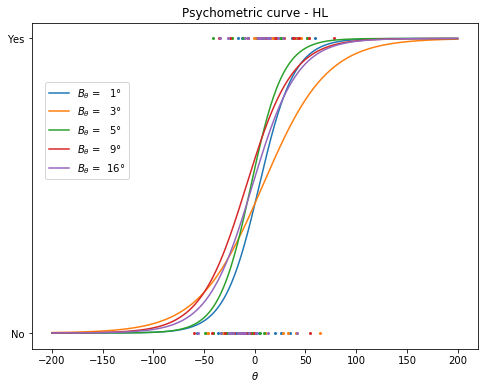

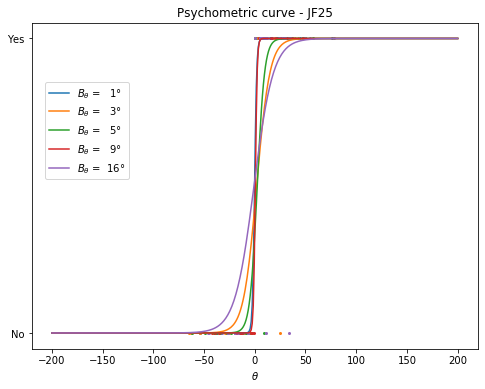

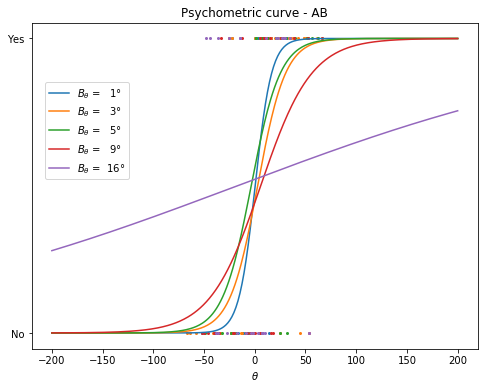

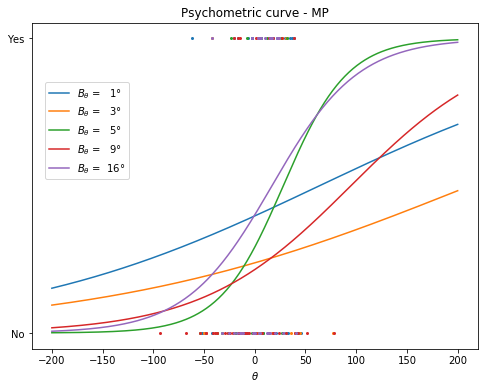

In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-200, 200, 400)
x_plot = np.reshape(x_values, (400,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})


b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    #color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if i[2] == 'right':  
                    y.append(1)
                else:
                    y.append(0)
                
                
        X = np.asarray(X)
        X = X[:,np.newaxis]
        #col = next(color)
        
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta)
            plt.scatter(X, y, s=4)
        except :
            pass
            
    plt.title('Psychometric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show

### Theta/B_sf